In [7]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

  Activating project at `D:\Science\Code\Julia\envr`


In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)
    return SVector(du1, du2, du3)
end;

In [3]:
t = 1000.0; tt = 1000.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const U0 = 0.3;  const ΔU0 = 0.305;
const I0 = -1.6;

In [5]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

### Multistability

In [7]:
u0_chaos = SA[3.8398031438626057, 0.8237522227211204, 0.4265960327571268]
ds_chaos = ContinuousDynamicalSystem(TM, u0_chaos, p)

3-dimensional continuous dynamical system
 state:       [3.8398, 0.823752, 0.426596]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.6]

In [8]:
u0_stable = SA[10.114129259254579, 0.7043935355527935, 0.41019986371663264]
ds_stable = ContinuousDynamicalSystem(TM, u0_stable, p)

3-dimensional continuous dynamical system
 state:       [10.1141, 0.704394, 0.4102]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.6]

In [9]:
tr_chaos = trajectory(ds_chaos, t, Δt = tstep; Ttr = tt, diffeq = integ_set)
tr_stable = trajectory(ds_stable, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

In [31]:
lb_size = 35; tck_size = 30;

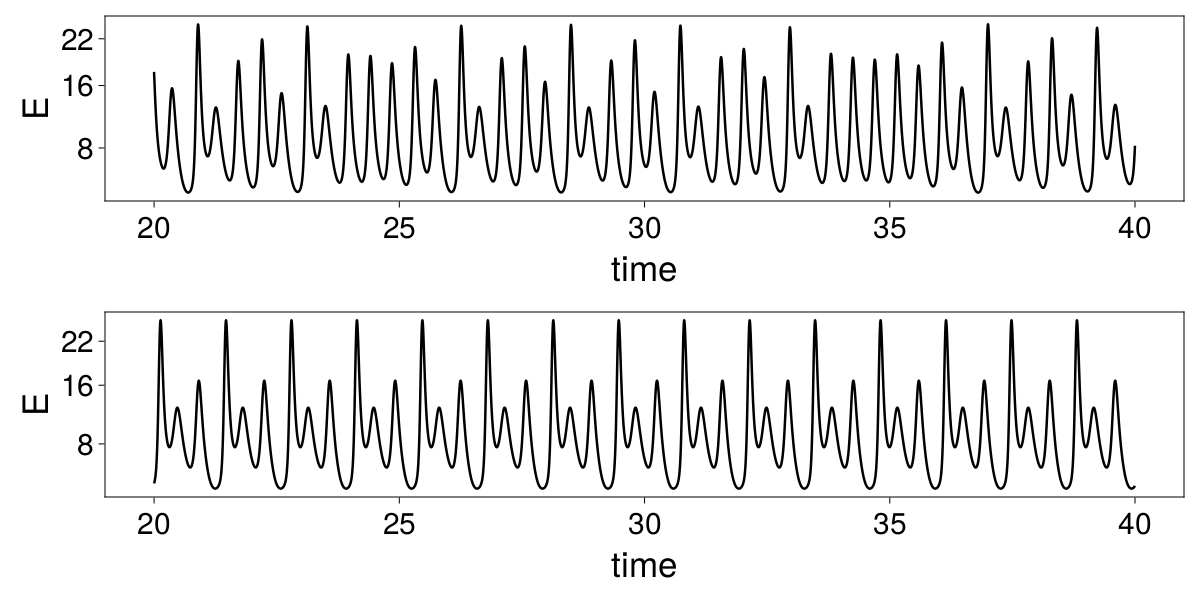

In [56]:
20000, 40000;
f = Figure(resolution = (1200, 600))
axis1 = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [8, 16, 22])
axis2 = Axis(f[2, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [8, 16, 22])

lines!(axis1, trange[ts:tf], tr_chaos[ts:tf, 1],  linewidth = 2.5, linestyle = :solid, color = :black)
lines!(axis2, trange[ts:tf], tr_stable[ts:tf, 1], linewidth = 2.5, linestyle = :solid, color = :black)
f

In [57]:
save("timeseries_multistab.eps", f)

CairoMakie.Screen{EPS}


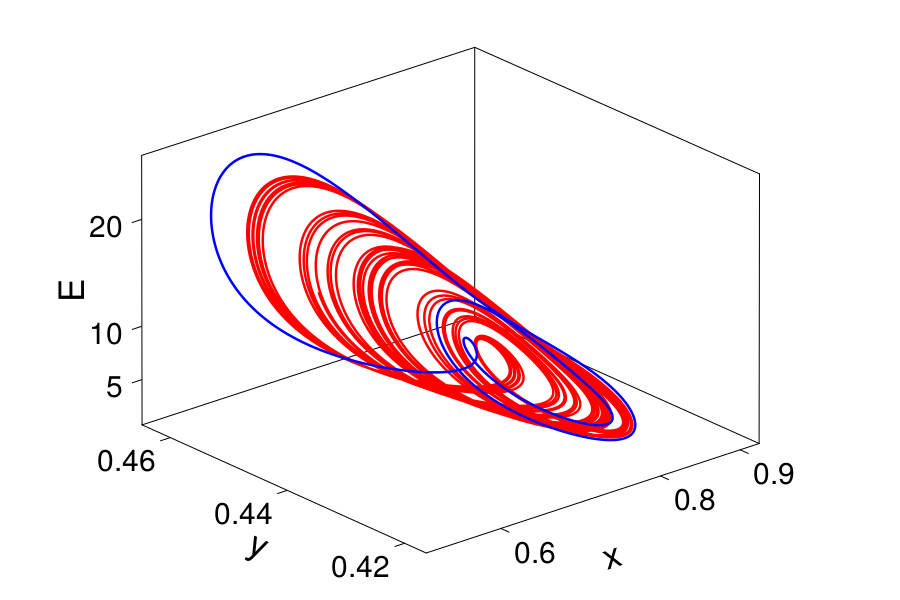

In [58]:
ts, tf = 20000, 40000
idx, idy, idz = 2, 3, 1

f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                xticks = [0.6 ,0.8, 0.9], yticks = [0.42, 0.44, 0.46], zticks = [5, 10, 20])

lines!(axis3, tr_chaos[ts:tf, idx], tr_chaos[ts:tf, idy], tr_chaos[ts:tf, idz],
        linewidth = 2.5, linestyle = :solid, color = :red)

lines!(axis3, tr_stable[ts:tf, idx], tr_stable[ts:tf, idy], tr_stable[ts:tf, idz],
        linewidth = 2.5, linestyle = :solid, color = :blue)
f

In [59]:
save("phase_multistab.eps", f)

CairoMakie.Screen{EPS}
